<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Taking-note-of-dataset-issues" data-toc-modified-id="Taking-note-of-dataset-issues-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Taking note of dataset issues</a></span></li><li><span><a href="#Identify-the-Clients" data-toc-modified-id="Identify-the-Clients-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Identify the Clients</a></span></li><li><span><a href="#Reservation-and-Cancelation" data-toc-modified-id="Reservation-and-Cancelation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reservation and Cancelation</a></span><ul class="toc-item"><li><span><a href="#Reservation" data-toc-modified-id="Reservation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Reservation</a></span><ul class="toc-item"><li><span><a href="#From-the-hotel-booking-data-from-July-1,2015-to-August-31,2017,-we-want-to-see-whether-there-are-any-patterns-in-the-Reservation,-such-as-seaonal-or-monthly" data-toc-modified-id="From-the-hotel-booking-data-from-July-1,2015-to-August-31,2017,-we-want-to-see-whether-there-are-any-patterns-in-the-Reservation,-such-as-seaonal-or-monthly-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>From the hotel booking data from July 1,2015 to August 31,2017, we want to see whether there are any patterns in the Reservation, such as seaonal or monthly</a></span></li><li><span><a href="#check-the-percentage-of-reservation-by-hotel-type" data-toc-modified-id="check-the-percentage-of-reservation-by-hotel-type-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>check the percentage of reservation by hotel type</a></span></li><li><span><a href="#We-further-breakdown-the-reservation-month-by-Resort-Hotel-and-City-Hotel,-to-see-if-there-are-any-differences" data-toc-modified-id="We-further-breakdown-the-reservation-month-by-Resort-Hotel-and-City-Hotel,-to-see-if-there-are-any-differences-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>We further breakdown the reservation month by Resort Hotel and City Hotel, to see if there are any differences</a></span></li></ul></li><li><span><a href="#Cancelation" data-toc-modified-id="Cancelation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cancelation</a></span><ul class="toc-item"><li><span><a href="#From-the-hotel-booking-data-from-July-1,2015-to-August-31,2017,-we-want-to-see-the-cancelation-rate-by-Hotel-Type" data-toc-modified-id="From-the-hotel-booking-data-from-July-1,2015-to-August-31,2017,-we-want-to-see-the-cancelation-rate-by-Hotel-Type-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>From the hotel booking data from July 1,2015 to August 31,2017, we want to see the cancelation rate by Hotel Type</a></span></li><li><span><a href="#From-the-hotel-booking-data-from-July-1,2015-to-August-31,2017,-we-want-to-see-if-the-cancelation-rate-fluctuates-through-time" data-toc-modified-id="From-the-hotel-booking-data-from-July-1,2015-to-August-31,2017,-we-want-to-see-if-the-cancelation-rate-fluctuates-through-time-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>From the hotel booking data from July 1,2015 to August 31,2017, we want to see if the cancelation rate fluctuates through time</a></span></li></ul></li></ul></li></ul></div>

In [2]:
#import pandas and numpy
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load the CSV data into DataFrames
hotel_booking = pd.read_csv('hotel_booking.csv')
display(hotel_booking.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Taking note of dataset issues

For the hotel booking set, we can see the dataset has too many columns which cannot completely be shown. An inspection of the .info() output for hotel booking dataset shows us that there are 36 columns in the dataset and there are multiple columns with null values.



In [4]:
#Summary of the hotel booking data to inspect
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

For the hotel booking data, the following columns have missing values and a lot of them:
 - children(Number of children)
 - country(Country of Origin)
 - agent(ID of the travel agency that made the booking)
 - company(ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons)
 
There are a lot of potential reasons for these missing values. Was the data ever tracked? Was it lost in history? Is the research effort to make this data whole worth it? In this case, we will check the percentage of the missing value.

# Identify the Clients

From the hotel booking data from July 1,2015 to August 31,2017, we want to see whether there are differences between the clients booked the City Hotel and Resort Hotel. To answer this question, we need to analyze and visualize the countries of the clients booked the City Hotel and Resort Hotel.

In [5]:
hotel_clients = hotel_booking[['hotel','country','adults','children','babies']]
hotel_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   hotel     119390 non-null  object 
 1   country   118902 non-null  object 
 2   adults    119390 non-null  int64  
 3   children  119386 non-null  float64
 4   babies    119390 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [6]:
# Convert multi-level index to columns
hotel_country = hotel_clients[['hotel','country']]
country_counts = hotel_country.groupby('hotel')['country'].value_counts(normalize=True).reset_index(name = 'percent_counts')
country_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hotel           291 non-null    object 
 1   country         291 non-null    object 
 2   percent_counts  291 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.9+ KB


In [7]:
city_country_counts = country_counts[country_counts['hotel'] == 'City Hotel']
resort_country_counts = country_counts[country_counts['hotel'] == 'Resort Hotel']

In [9]:
!pip install squarify

In [10]:
# Import matplotlib and treemap library 
import matplotlib.pyplot as plt
import squarify

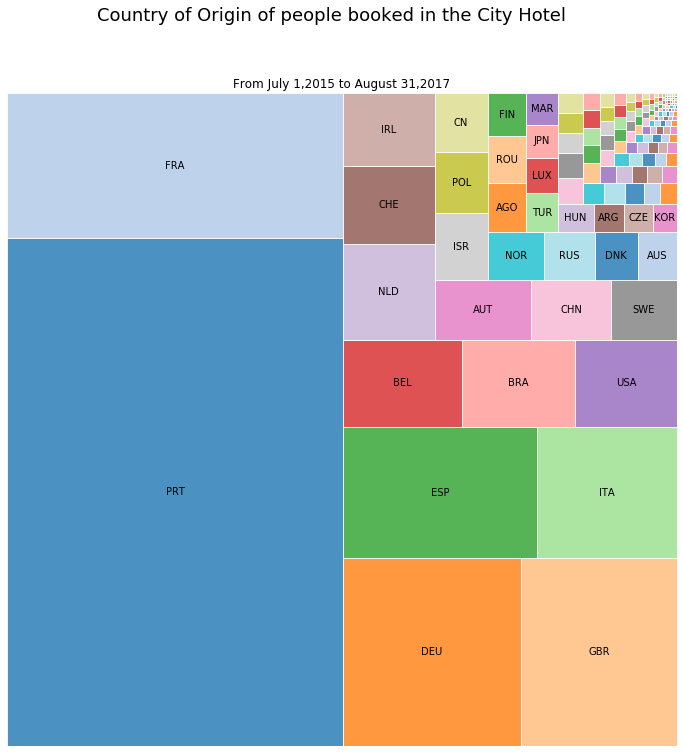

In [11]:
# Plot arguments
fig = plt.figure(figsize=(12,12))
color = plt.cm.tab20.colors
squarify.plot(sizes=city_country_counts['percent_counts'],color=color,label = city_country_counts['country'][:33],ec='white',alpha=.8)
plt.suptitle("Country of Origin of people booked in the City Hotel", fontsize=18)
plt.title("From July 1,2015 to August 31,2017",fontsize=12)
plt.axis('off')
plt.savefig("Country in the City Hotel.png")
plt.show()

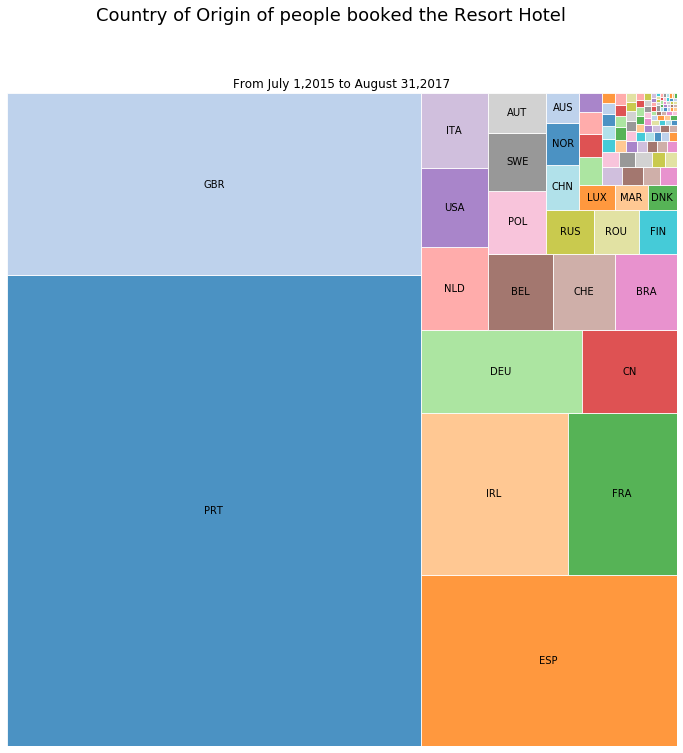

In [12]:
fig = plt.figure(figsize=(12,12))
squarify.plot(sizes=resort_country_counts['percent_counts'],label = resort_country_counts['country'][:25],color=color,ec='white',alpha=.8)
plt.suptitle("Country of Origin of people booked the Resort Hotel", fontsize=18)
plt.title("From July 1,2015 to August 31,2017",fontsize=12)
plt.axis('off')
plt.savefig("Country in the Resort Hotel.png")
plt.show()

In [13]:
hotel_clients.groupby(['hotel','adults','children','babies']).size().to_frame()

0
hotel        adults children babies     
City Hotel   0      0.0      0       167
                    1.0      0         4
                    2.0      0       205
                             1         3
                    3.0      0        11
...                                  ...
Resort Hotel 26     0.0      0         5
             27     0.0      0         2
             40     0.0      0         1
             50     0.0      0         1
             55     0.0      0         1

[61 rows x 1 columns]

In [23]:
hotel_df = pd.read_csv('hotel_booking.csv')

# Reservation and Cancelation

## Reservation

### From the hotel booking data from July 1,2015 to August 31,2017, we want to see whether there are any patterns in the Reservation, such as seaonal or monthly

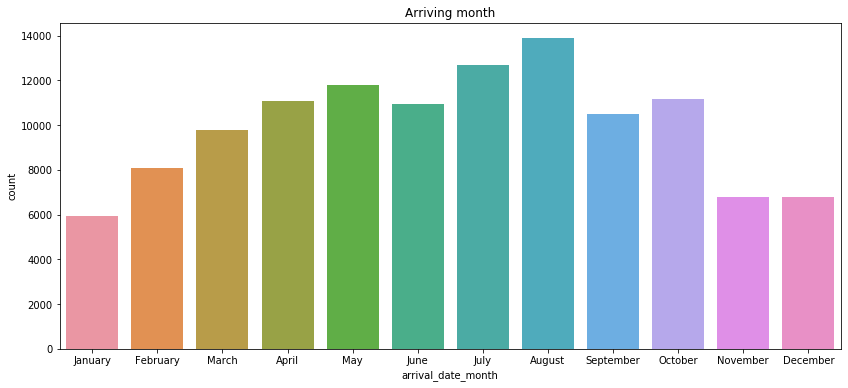

In [26]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,6))
sns.countplot(hotel_df['arrival_date_month'], order = month_sorted)
#plt.xticks(rotation = 40)
plt.title('Arriving month')
plt.show()


### check the percentage of reservation by hotel type

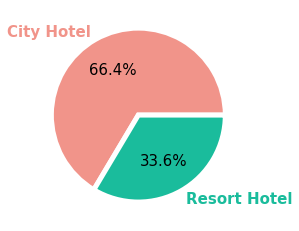

In [56]:
c = ['#F1948A', '#1ABC9C']

patches, texts, pcts=plt.pie(hotel_df['hotel'].value_counts(),labels =hotel_df['hotel'].value_counts().index,colors=c, autopct='%.1f%%' ,
         wedgeprops={'linewidth': 5.0, 'edgecolor': 'white'},textprops={'size': '15', 'color':'black'})
plt.setp(texts, fontweight=700)

for i, color in enumerate(c):
    texts[i].set_color(color)

### We further breakdown the reservation month by Resort Hotel and City Hotel, to see if there are any differences

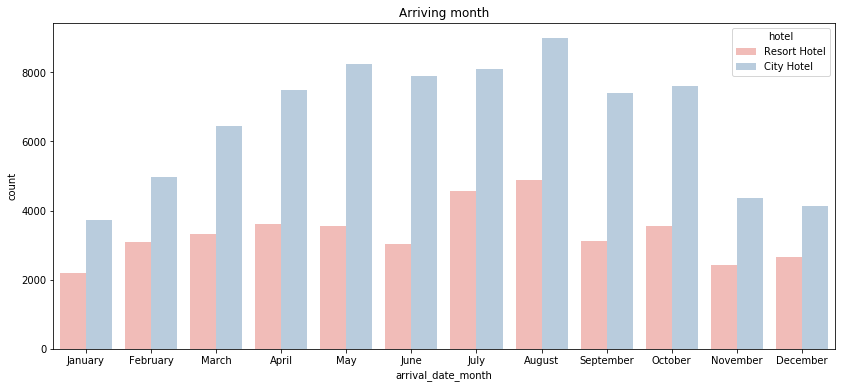

In [40]:
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_month',hue='hotel',data=hotel_df,palette='Pastel1',order = month_sorted)
#plt.xticks(rotation = 40)
plt.title('Arriving month by Hotel Type')
plt.show()

We do not see much difference in the pattern of reservation by hotel type, the ratio  stays relatively stable through out the year.

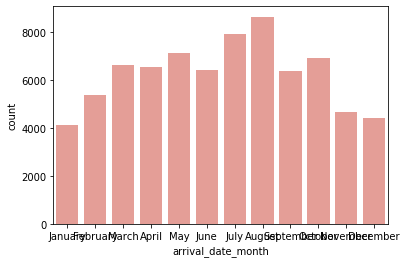

In [30]:
sns.countplot(hotel_df[hotel_df['is_canceled']==0]['arrival_date_month'], color='#F1948A', order = month_sorted)

## Cancelation

### From the hotel booking data from July 1,2015 to August 31,2017, we want to see the cancelation rate by Hotel Type

Text(0.5, 1.0, 'Cancelation rates in City hotel and Resort hotel')

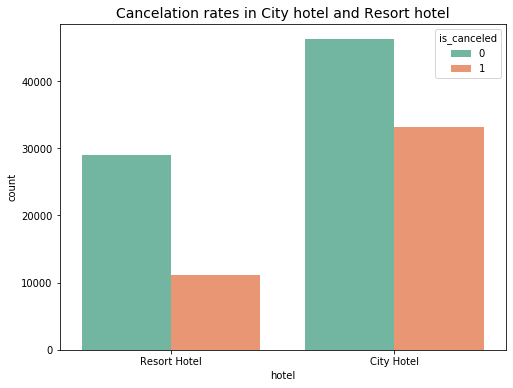

In [51]:
plt.figure(figsize=(8,6))

sns.countplot(x='hotel',hue='is_canceled',data=hotel_df,palette='Set2')
plt.title('Cancelation rates in City hotel and Resort hotel',fontsize=14)

City Hotel have higher overall cancelation than Resort hotel

### From the hotel booking data from July 1,2015 to August 31,2017, we want to see if the cancelation rate fluctuates through time

first we look at City Hotel, the cancelation rates stays relatively stable

Text(0.5, 1.0, 'Cancelation rates by Month in City hotel')

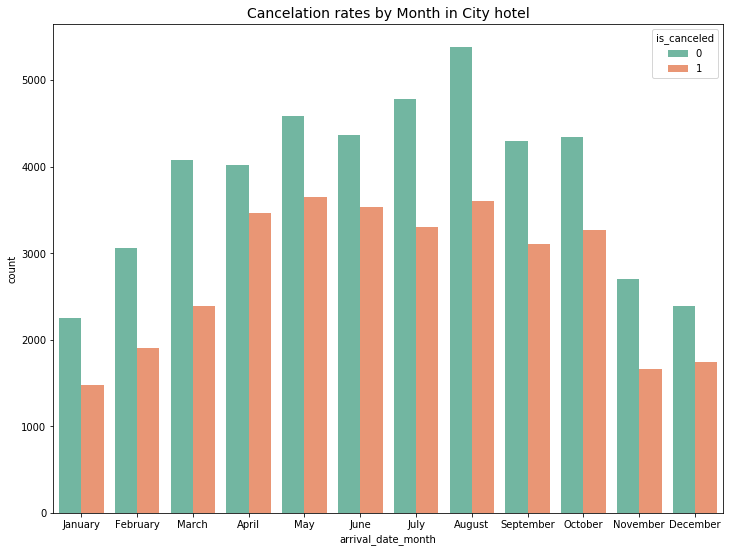

In [54]:
plt.figure(figsize=(12,9))

sns.countplot(x='arrival_date_month',hue='is_canceled',data=hotel_df[hotel_df['hotel']=='City Hotel'],palette='Set2',
              order = month_sorted)
plt.title('Cancelation rates by Month in City hotel',fontsize=14)

then we look at Resort Hotel, we see cancelation rate raise during the busy summer months,etc July August

Text(0.5, 1.0, 'Cancelation rates by Month in Resort hotel')

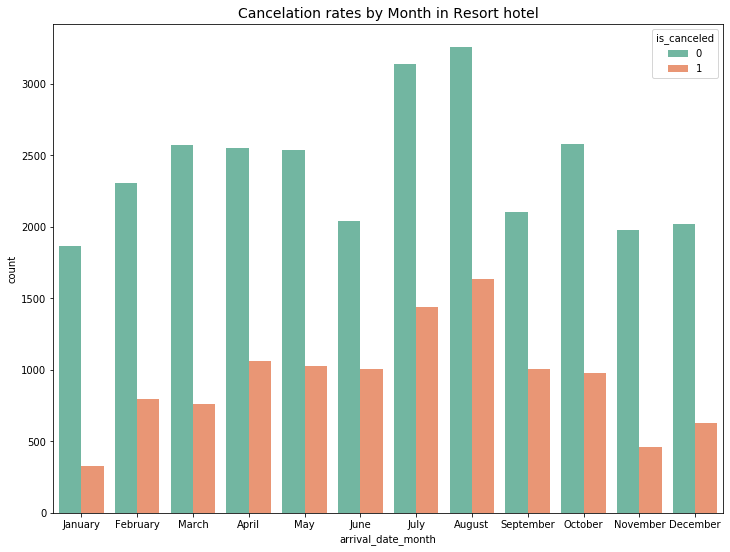

In [55]:
plt.figure(figsize=(12,9))

sns.countplot(x='arrival_date_month',hue='is_canceled',data=hotel_df[hotel_df['hotel']=='Resort Hotel'],palette='Set2',
              order = month_sorted)
plt.title('Cancelation rates by Month in Resort hotel',fontsize=14)